In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [8]:
data_feature = data.drop(labels = "number_of_elements", axis = 1)

In [9]:
data_feature

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.906070,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.906070,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.906070,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.906070,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.906070,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
5,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.906070,20.687458,51.968828,53.521150,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.00
6,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.906070,10.765639,51.968828,53.351558,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.00
7,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.906070,36.451199,44.289459,52.924140,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.00
8,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.906070,34.833160,44.289459,52.533207,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.00
9,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.906070,33.215121,44.289459,52.136769,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.00


In [11]:
standardizedData = StandardScaler().fit_transform(data_feature)
X = standardizedData
y = data.number_of_elements

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


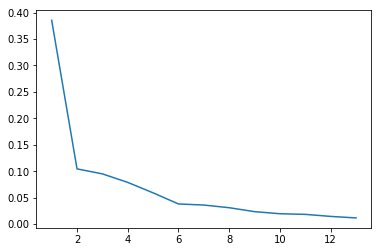

In [12]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X)
#pca.get_covariance()
#pca.explained_variance_
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
a=pca.explained_variance_ratio_
g=range(1,14)
plt.plot(g,a)
plt.show()

In [13]:
pca = PCA(.90)

principalComponents1 = pca.fit_transform(X)
# To get how many principal components was chosen
n_components = pca.n_components_
print("n_components = ",pca.n_components_)
pca = PCA(n_components)

principalComponents2 = pca.fit_transform(X)

# to get how much variance was retained
print(pca.explained_variance_ratio_.sum())

n_components =  12
0.9047002047938676


In [14]:
X_Train = X
X_Test = X
Y_Train = y
Y_Test= y
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((21263, 81), (21263, 81), (21263,), (21263,))

In [15]:
DTClassifier = DecisionTreeClassifier (criterion='gini', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels = DTClassifier.predict(X_Test)
accuracyscore = accuracy_score(Y_Test, predicted_labels)
print("accuracy = ", accuracyscore*100.0)
print(confusion_matrix(Y_Test, predicted_labels))
print(classification_report(Y_Test, predicted_labels))

accuracy =  98.30691812067911
[[   0  285    0    0    0    0    0    0    0]
 [   0 3280    0    0    0    0    0    0    0]
 [   0    0 3895    0    0    0    0    0    0]
 [   0    0    0 4496    0    0    0    0    0]
 [   0    0    0    0 5792    0    0    0    0]
 [   0    0    0    0    0 2666    0    0    0]
 [   0    0    0    0    0    0  774    0    0]
 [   0    0    0    0    0    0   61    0    0]
 [   0    0    0    0    0    0   14    0    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       285
           2       0.92      1.00      0.96      3280
           3       1.00      1.00      1.00      3895
           4       1.00      1.00      1.00      4496
           5       1.00      1.00      1.00      5792
           6       1.00      1.00      1.00      2666
           7       0.91      1.00      0.95       774
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00       

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
X_Train1 = principalComponents2
X_Test1 = principalComponents2
Y_Train1 = y 
Y_Test1= y
X_Train1.shape, X_Test1.shape, Y_Train1.shape, Y_Test1.shape

((21263, 12), (21263, 12), (21263,), (21263,))

In [17]:
DTClassifier = DecisionTreeClassifier (criterion='gini', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train1,Y_Train1)
predicted_labels2 = DTClassifier.predict(X_Test1)
accuracyscore2 = accuracy_score(Y_Test1, predicted_labels2)
print("accuracy = ", accuracyscore2*100.0)
print(confusion_matrix(Y_Test1, predicted_labels2))
print(classification_report(Y_Test1, predicted_labels2))

accuracy =  65.84677608992145
[[ 210   75    0    0    0    0    0    0    0]
 [  21 2958  251   31   19    0    0    0    0]
 [   0  848 2306  128  613    0    0    0    0]
 [   0    7  515 1734 2233    7    0    0    0]
 [   0    0    0   34 5150  608    0    0    0]
 [   0    0    0    0 1023 1643    0    0    0]
 [   0    0    0    0  339  435    0    0    0]
 [   0    0    0    0    9   52    0    0    0]
 [   0    0    0    0    0   14    0    0    0]]
              precision    recall  f1-score   support

           1       0.91      0.74      0.81       285
           2       0.76      0.90      0.83      3280
           3       0.75      0.59      0.66      3895
           4       0.90      0.39      0.54      4496
           5       0.55      0.89      0.68      5792
           6       0.60      0.62      0.61      2666
           7       0.00      0.00      0.00       774
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00       

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
DTClassifier = DecisionTreeClassifier (criterion='entropy', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train1,Y_Train1)
predicted_labels3 = DTClassifier.predict(X_Test1)
accuracyscore3 = accuracy_score(Y_Test1, predicted_labels3)
print("accuracy = ", accuracyscore3*100.0)
print(confusion_matrix(Y_Test1, predicted_labels3))
print(classification_report(Y_Test1, predicted_labels3))

accuracy =  66.74975309222593
[[ 272   13    0    0    0    0    0    0    0]
 [ 181 2843  245    5    6    0    0    0    0]
 [   9  864 2610   78  334    0    0    0    0]
 [   0   22 1250 1594 1630    0    0    0    0]
 [   0    0   19    6 5535  232    0    0    0]
 [   0    0    0    0 1327 1339    0    0    0]
 [   0    0    0    0  349  425    0    0    0]
 [   0    0    0    0   13   48    0    0    0]
 [   0    0    0    0    0   14    0    0    0]]
              precision    recall  f1-score   support

           1       0.59      0.95      0.73       285
           2       0.76      0.87      0.81      3280
           3       0.63      0.67      0.65      3895
           4       0.95      0.35      0.52      4496
           5       0.60      0.96      0.74      5792
           6       0.65      0.50      0.57      2666
           7       0.00      0.00      0.00       774
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00       

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
